# Rossman Pharmacueticals Sales

## Customer Purchase Behavior Exploration
This notebook presents the exploratory data analysis on the dataset. I will explore the behavior of customers in various stores. The goal is to check how some measures such as promos and opening of new stores affect purchasing behavior. I will visualize various features and interactions in order to be able to clearly communicate my findings.

### Importing all the necessary libraries and modules

In [1]:
#standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import pandas as pd

#custom-made libraries
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData #for loading the dataset from source files
from preprocess import Preprocess #for data preprocessing
from plot import Plot #plotting and visualization

### Loading the data 

##### Initialize the load, process and plot classes

In [2]:
loader = LoadData()
preprocessor = Preprocess()
plot = Plot()
pd.set_option('display.float_format', lambda x: '%.8f' % x)

##### Loading the raw datasets from csv files into pandas DataFrames

In [3]:
train_df = loader.read_csv('../data/raw/train/train.csv') #contains the train dataset
test_df = loader.read_csv('../data/raw/test/test.csv')  #contains the test dataset
store_df = loader.read_csv('../data/raw/store.csv') #contains store information

C:\Users\wakur\OneDrive\Documents\GitHub\Pharmaceutical-Sales-prediction\scripts\load_data.py:66: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_file)


In [4]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.00000000,1,0,0
1,2,3,4,2015-09-17,1.00000000,1,0,0
2,3,7,4,2015-09-17,1.00000000,1,0,0
3,4,8,4,2015-09-17,1.00000000,1,0,0
4,5,9,4,2015-09-17,1.00000000,1,0,0


In [6]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
1,2,a,a,570.00000000,11.00000000,2007.00000000,1,13.00000000,2010.00000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00000000,12.00000000,2006.00000000,1,14.00000000,2011.00000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00000000,9.00000000,2009.00000000,0,NaN,NaN,NaN
4,5,a,a,29910.00000000,4.00000000,2015.00000000,0,NaN,NaN,NaN


Successfully loaded the train and test data sets into a pandas DataFrame. I have also loaded stores information into a DataFrame. Next steps I will now start cleaning the data before conduction exploaratory data analysis and visualizations on the datasets.

### Exploratory Data Analysis

#### Merging the datasets
I will merge train data with the stores data and also merge the test data with the stores dataset

In [7]:
#merging the train set with stores info
train_df = pd.merge(train_df, store_df, on='Store')

#merging the test set with the stores info
test_df = pd.merge(test_df, store_df, on='Store')

In [8]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN


In [9]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.00000000,0,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN


#### Convert the dates provided in the datasets into datetime formats

In [10]:
train_df = preprocessor.convert_to_datetime(train_df, 'Date')
test_df = preprocessor.convert_to_datetime(test_df, 'Date')

#### Transform StateHoliday column 
StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

In [11]:
train_df["StateHoliday"].loc[train_df["StateHoliday"] == 0] = "0"
test_df["StateHoliday"].loc[test_df["StateHoliday"] == 0] = "0"

C:\Users\wakur\AppData\Local\Temp\ipykernel_6652\4253227178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["StateHoliday"].loc[train_df["StateHoliday"] == 0] = "0"
C:\Users\wakur\AppData\Local\Temp\ipykernel_6652\4253227178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["StateHoliday"].loc[test_df["StateHoliday"] == 0] = "0"


#### Extracting the date information from the date
I will extract the date, weekday, month, year and other information from the date column

In [12]:
train_df = preprocessor.extract_fields_date(train_df, 'Date')
train_df.head()

C:\Users\wakur\OneDrive\Documents\GitHub\Pharmaceutical-Sales-prediction\scripts\preprocess.py:137: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[date_column].dt.weekofyear


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,4,31,0
1,1,3,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,30,3,31,0
2,1,2,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,29,2,31,0
3,1,1,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,28,1,31,0
4,1,0,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,27,0,31,1


#### Exploring the Train Set

In [13]:
print(f'The shape of the train set is: {train_df.shape}')

The shape of the train set is: (1017209, 24)


In [14]:
train_df[['Sales', 'CompetitionDistance']].describe()

,Sales,CompetitionDistance
count,1017209.00000000,1014567.00000000
mean,5773.81897231,5430.08565230
std,3849.92617523,7715.32370027
min,0.00000000,20.00000000
25%,3727.00000000,710.00000000
50%,5744.00000000,2330.00000000
75%,7856.00000000,6890.00000000
max,41551.00000000,75860.00000000


In [15]:
train_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Day                               0
weekday                           0
weekofyear                        0
weekend                           0
dtype: int64

<ul>
    <li>The train set has 1017209 rows and 24 columns</li>
    <li>In train set, the highest sale was was 41551 and the lowest sale was 0. The average sales per day in the training set is 3849.93</li>
    <li>the largest distance from the the competitor is 75860 while the smallest distance is 20 unless there is no competition</li>
    <li> the average distance from competitors is 5430.085652</li>
    <li> Some columns in the train dataset has missing values but those missing values totally makes sense. For example, Promo2SinceWeek contains missing values and that can be probably because there was no Promo2. As a result, there is no need to impute missing values. The key column, **Sales** do not have any missing values</li>
</ul>        

#### Exploring the Test Set

In [16]:
print(f'The shape of the test set is: {test_df.shape}')

The shape of the test set is: (41088, 17)


In [17]:
test_df['CompetitionDistance'].describe()

count   40992.00000000
mean     5088.58313817
std      7225.48746728
min        20.00000000
25%       720.00000000
50%      2425.00000000
75%      6480.00000000
max     75860.00000000
Name: CompetitionDistance, dtype: float64

In [18]:
test_df.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

<ul>
    <li>The train set has 41088 rows and 17 columns</li>
    <li>the largest distance from the the competitor is 75860 while the smallest distance is 20 unless there is no competition</li>
    <li> the average distance from competitors is 5088.58313817</li>
    <li> Some columns in the train dataset has missing values but those missing values totally makes sense. For example, Promo2SinceWeek contains missing values and that can be probably because there was no Promo2. As a result, there is no need to impute missing values.</li>
</ul>        

#### Further Analysis
For further analysis, I am going to drop **Id** column from both datasets (train and test). I am also going to set the **Date** column as the index of both datasets

In [19]:
# Drop Id column from test dataset. train dataset has no Id column
test_df.drop('Id', axis=1, inplace=True)
test_df.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
1,1,3,2015-09-16,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
2,1,2,2015-09-15,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
3,1,1,2015-09-14,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
4,1,7,2015-09-13,0.00000000,0,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN


In [20]:
# set the Date column as the index
train_df.set_index("Date", inplace=True)
test_df.set_index('Date', inplace=True)

In [21]:
test_df.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,
2015-09-17,1,4,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
2015-09-16,1,3,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
2015-09-15,1,2,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
2015-09-14,1,1,1.00000000,1,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN
2015-09-13,1,7,0.00000000,0,0,0,c,a,1270.00000000,9.00000000,2008.00000000,0,NaN,NaN,NaN


In [22]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,4,5263,555,1,1,0,1,c,a,...,0,NaN,NaN,NaN,2015,7,31,4,31,0
2015-07-30,1,3,5020,546,1,1,0,1,c,a,...,0,NaN,NaN,NaN,2015,7,30,3,31,0
2015-07-29,1,2,4782,523,1,1,0,1,c,a,...,0,NaN,NaN,NaN,2015,7,29,2,31,0
2015-07-28,1,1,5011,560,1,1,0,1,c,a,...,0,NaN,NaN,NaN,2015,7,28,1,31,0
2015-07-27,1,0,6102,612,1,1,0,1,c,a,...,0,NaN,NaN,NaN,2015,7,27,0,31,1


##### Checking for the distribution of promotions in the training and test sets

<AxesSubplot:ylabel='Promo'>

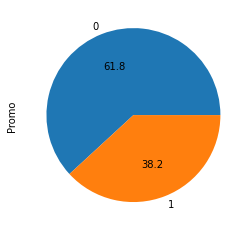

In [23]:
#plotting the distribution of promos in train dataset
train_df['Promo'].value_counts().plot.pie(autopct='%1.1f')

<AxesSubplot:ylabel='Promo'>

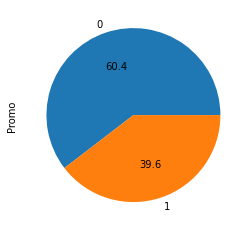

In [24]:
#Plotting the distribution of Promos in Test dataset
test_df['Promo'].value_counts().plot.pie(autopct='%1.1f')

<AxesSubplot:ylabel='Promo2'>

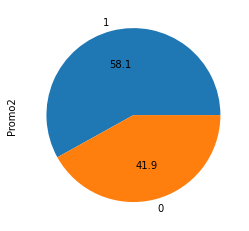

In [25]:
test_df['Promo2'].value_counts().plot.pie(autopct='%1.1f')

<AxesSubplot:ylabel='Promo2'>

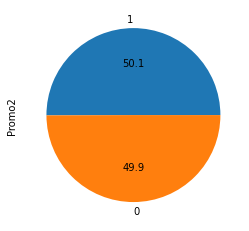

In [26]:
train_df['Promo2'].value_counts().plot.pie(autopct='%1.1f')

<ul>
    <li>The percentage of Promo in the train dataset is slightly lower than the promos in the test dataset. The percentage of Promos in test is 39.6% while that of train is 38.2%</li>
    <li>The percentage of Promo2 in the train set is 50.1% while the percentage of Promo2 in the test set is 58.1%.</li>
    <li>Generally, they are more promo2 in than Promo and there are more promotions in the test set than in the train set</li>
</ul>

##### Comparing the Sales on Holidays

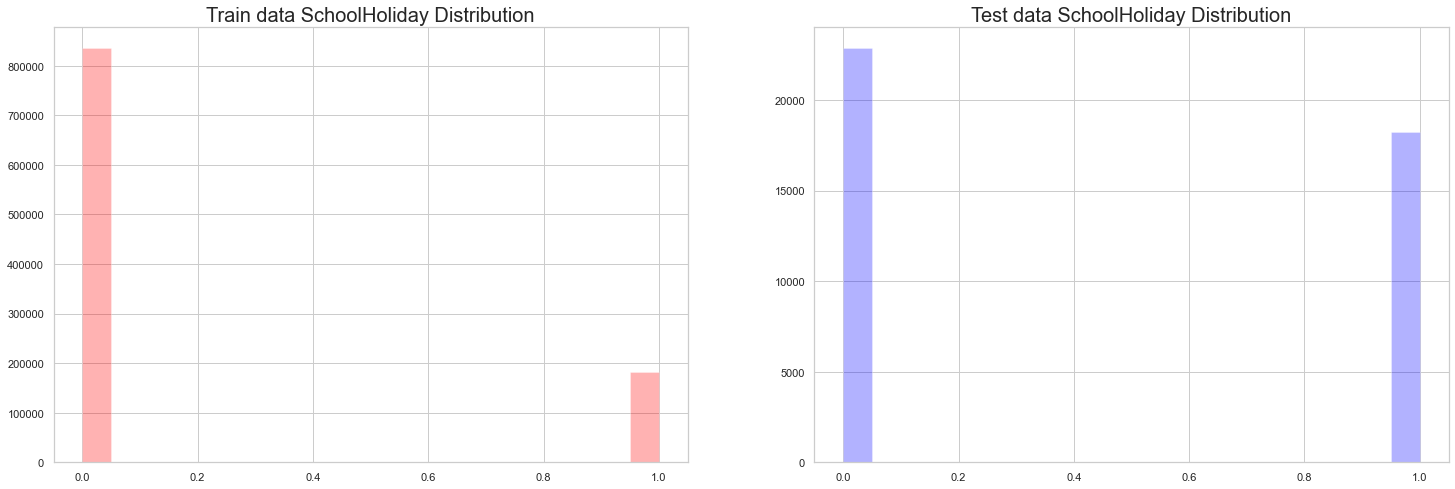

In [27]:
plot.plot_subplots(train_df['SchoolHoliday'], test_df['SchoolHoliday'], 'Train data SchoolHoliday Distribution', 'Test data SchoolHoliday Distribution')

In [28]:
#create an new df aggregating the mean of sales on holidays
holiday_sales_df=train_df.groupby(['StateHoliday'])['Sales'].mean().reset_index()
holiday_sales_df.head()

,StateHoliday,Sales
0,0,5947.48389256
1,a,290.73568608
2,b,214.31150972
3,c,168.73317073


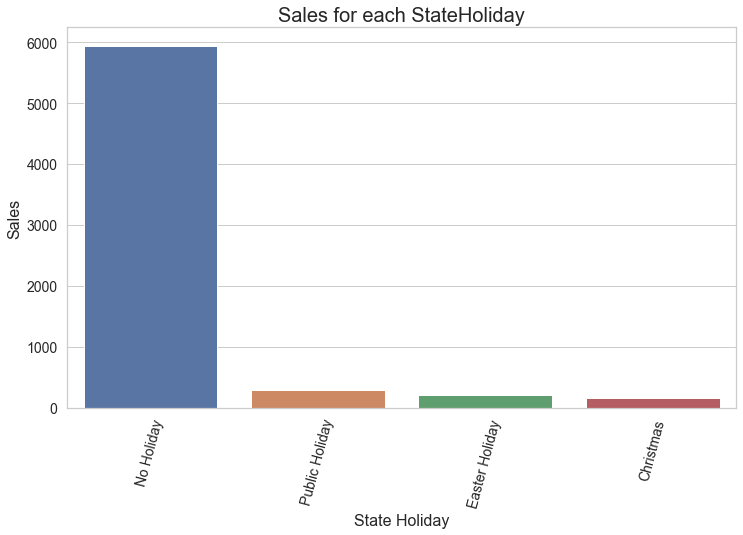

In [29]:
# Rename StateHoliday values
holiday_sales_df.replace({'StateHoliday': {'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}}, inplace=True)

# Plot the distribution of sales on various holidays
plot.plot_bar(holiday_sales_df, 'StateHoliday', 'Sales', 'Sales for each StateHoliday', 'State Holiday', 'Sales')

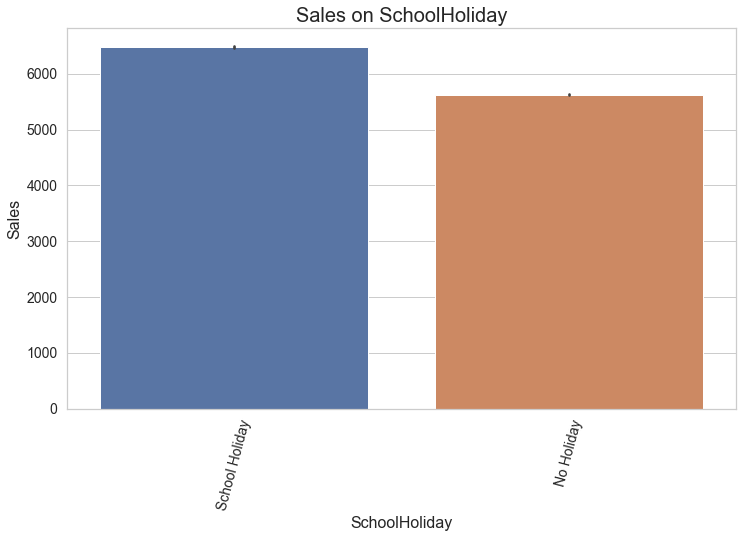

In [30]:
# Comparing sales on SchoolHolidays
school_holiday = train_df.replace({'SchoolHoliday': {0: 'No Holiday', 1: 'School Holiday'}})

# plot

plot.plot_bar(school_holiday, 'SchoolHoliday', 'Sales', 'Sales on SchoolHoliday', 'SchoolHoliday', 'Sales')

<ul>
    <li>Holidays affect the total sales made. During  public holidays, the sales are so low probably because most stores are closed on Holidays.</li>
    </li>there is also seasonal differnce in the amount of sales made. During Holiday seasons including Christmas, Easter and public holidays, the sales are very low probably because stores are closed on holidays</li>
</ul>


##### Comparing the Sales made in Correlation to Total customers

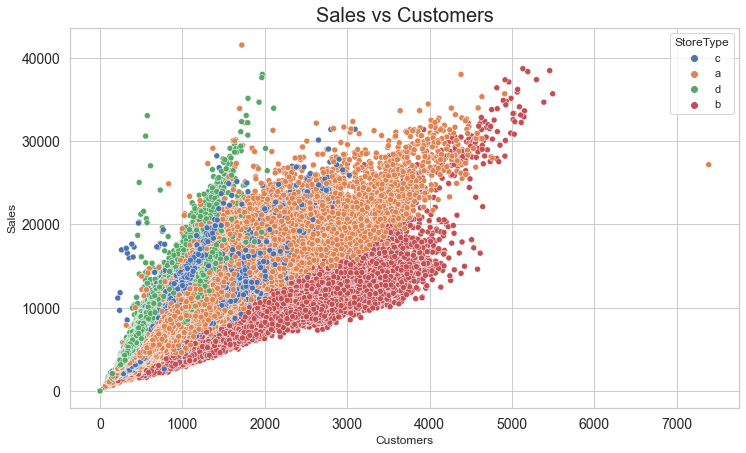

In [31]:
attributes = ["Sales", "Customers"]
plot.plot_scatter(train_df[attributes], train_df['Customers'], train_df['Sales'], 'Sales vs Customers', train_df['StoreType'], None)

#### Sales Based on Assortment type

[]

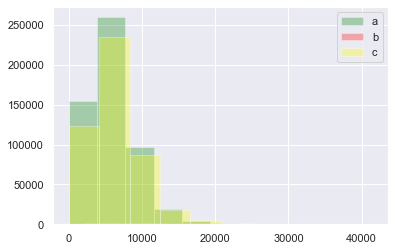

In [32]:
#Sales_Assortment
sns.set()
plt.hist(train_df[train_df['Assortment'] == 'a'].Sales, color='green', alpha=0.3, label = 'a')
plt.hist(train_df[train_df['Assortment'] == 'b'].Sales, color='red', alpha=0.3, label = 'b')
plt.hist(train_df[train_df['Assortment'] == 'c'].Sales, color='yellow', alpha=0.3, label = 'c')
plt.legend()
plt.plot()

Assortment A stores has high sales, b has the lowest

#### Plot the Sales vs. CompetitionDistance

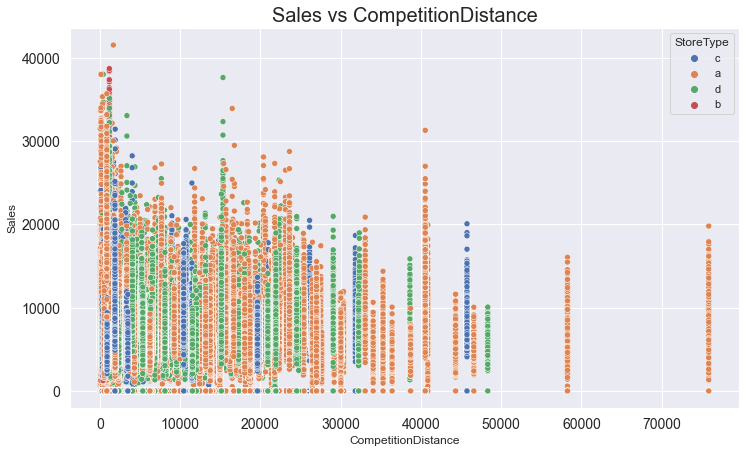

In [33]:
attributes = ["Sales", "CompetitionDistance"]
plot.plot_scatter(train_df[attributes], train_df['CompetitionDistance'], train_df['Sales'], 'Sales vs CompetitionDistance', train_df['StoreType'], None)

Interestingly, as the competition distance increases, the sales decreases. This may be because most stores are located close to each other at prime locations where they can easily find customers.

#### Sales bahavior when stores are closed and open on various days of the week

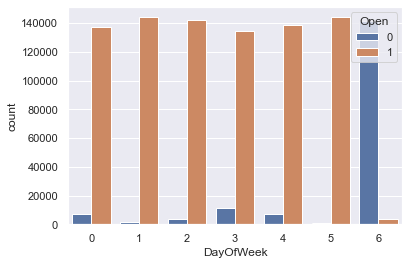

In [34]:
#How many stores are open during various days of the week
sns.countplot( x='DayOfWeek', data=train_df, hue="Open", palette="deep");

In [35]:
# Check for stores that are open during weekdays
open_stores = train_df.query('Open == 1 and DayOfWeek > 0 and DayOfWeek < 6')
open_stores.groupby(['DayOfWeek'])['Sales'].mean().reset_index()

,DayOfWeek,Sales
0,1,7088.11365578
1,2,6728.12297796
2,3,6767.31015864
3,4,7072.67701241
4,5,5874.84023796


In [36]:
# Check for stores that are open during weekends
weekend_stores = train_df.query('Open == 1 and (DayOfWeek > 5 or DayOfWeek < 1)')
weekend_stores.groupby(['DayOfWeek'])['Sales'].mean().reset_index()

,DayOfWeek,Sales
0,0,8216.07307357
1,6,8224.72390760


#### Sales bahavior based on various Promos

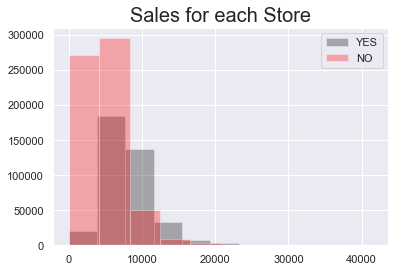

In [37]:
#Sales_Promo
plot.plot_hist_2d(train_df[train_df['Promo'] == 1], train_df[train_df['Promo'] == 0], 'Sales', 'Sales', 'Sales for each Store', 'YES', 'NO')

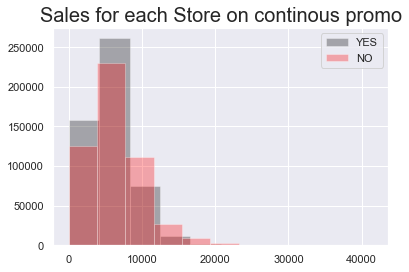

In [38]:
plot.plot_hist_2d(train_df[train_df['Promo2'] == 1], train_df[train_df['Promo2'] == 0], 'Sales', 'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')

Stores with continous promos have more sales as compared to stores with only one Promo.

#### Sales Behaviour based on Store types

[]

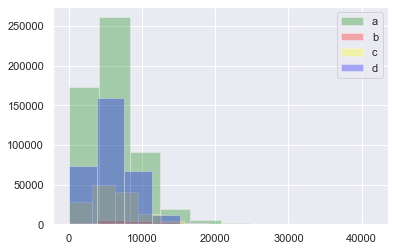

In [39]:
#Sales_StoreType
sns.set()
plt.hist(train_df[train_df['StoreType'] == 'a'].Sales, color='green', alpha=0.3, label = 'a')
plt.hist(train_df[train_df['StoreType'] == 'b'].Sales, color='red', alpha=0.3, label = 'b')
plt.hist(train_df[train_df['StoreType'] == 'c'].Sales, color='yellow', alpha=0.3, label = 'c')
plt.hist(train_df[train_df['StoreType'] == 'd'].Sales, color='blue', alpha=0.3, label = 'd')
plt.legend()
plt.plot()

Stores of type **a** have more sales as compared to other stores. Stores of type **b** have the least sales.